In [9]:
import numpy
import pandas as pd

In [10]:
data=pd.read_csv("crop_yield.csv")

In [11]:
data.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


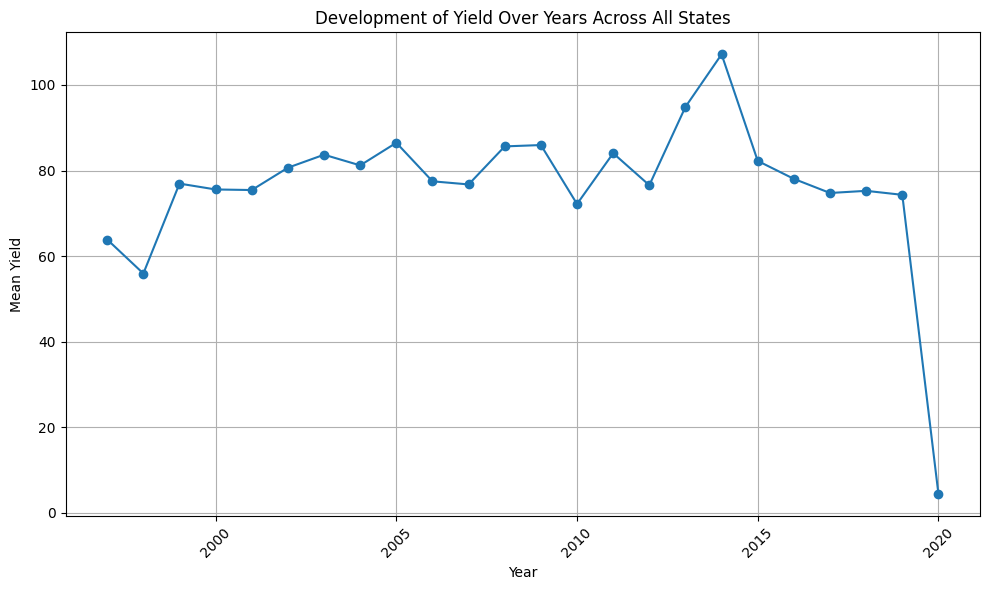

In [12]:
import matplotlib.pyplot as plt

yearly_yield = data.groupby('Crop_Year')['Yield'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
plt.title('Development of Yield Over Years Across All States')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

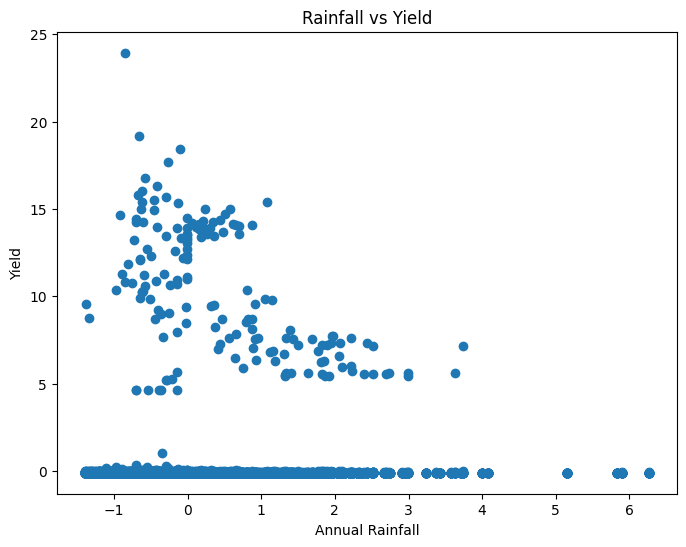

In [33]:
# Scatter plot showing the relationship between rainfall and yield
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual_Rainfall'], data['Yield'])
plt.title('Rainfall vs Yield')
plt.xlabel('Annual Rainfall')
plt.ylabel('Yield')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


data['Crop_Year'] = scaler.fit_transform(data[['Crop_Year']])
data['Area'] = scaler.fit_transform(data[['Area']])
data['Production'] = scaler.fit_transform(data[['Production']])
data['Annual_Rainfall'] = scaler.fit_transform(data[['Annual_Rainfall']])
data['Fertilizer'] = scaler.fit_transform(data[['Fertilizer']])
data['Pesticide'] = scaler.fit_transform(data[['Pesticide']])
data['Yield'] = scaler.fit_transform(data[['Yield']])

In [14]:
data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,-1.866375,Whole Year,Assam,-0.144802,-0.062267,0.751197,-0.179880,-0.121745,-0.090128
1,Arhar/Tur,-1.866375,Kharif,Assam,-0.236473,-0.062464,0.751197,-0.247217,-0.219385,-0.090225
2,Castor seed,-1.866375,Kharif,Assam,-0.244443,-0.062482,0.751197,-0.253072,-0.227875,-0.090763
3,Coconut,-1.866375,Whole Year,Assam,-0.218707,0.419954,0.751197,-0.234167,-0.200462,5.872928
4,Cotton(lint),-1.866375,Kharif,Assam,-0.243157,-0.062479,0.751197,-0.252127,-0.226504,-0.090555
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,-1.712480,Kharif,Nagaland,-0.240071,-0.062475,0.073749,-0.249707,-0.223593,-0.090465
19685,Wheat,-1.712480,Rabi,Nagaland,-0.244165,-0.062471,0.073749,-0.252829,-0.227672,-0.087619
19686,Maize,-1.866375,Kharif,Jammu and Kashmir,0.178704,-0.060806,-0.099836,0.057755,0.222829,-0.089571
19687,Rice,-1.866375,Kharif,Jammu and Kashmir,0.130756,-0.062461,-0.099836,0.022534,0.171758,-0.091015


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
data['Crop'] = label_encoder.fit_transform(data['Crop'])
data['Season'] = label_encoder.fit_transform(data['Season'])
data['State'] = label_encoder.fit_transform(data['State'])

In [17]:
data

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,-1.866375,4,2,-0.144802,-0.062267,0.751197,-0.179880,-0.121745,-0.090128
1,1,-1.866375,1,2,-0.236473,-0.062464,0.751197,-0.247217,-0.219385,-0.090225
2,8,-1.866375,1,2,-0.244443,-0.062482,0.751197,-0.253072,-0.227875,-0.090763
3,9,-1.866375,4,2,-0.218707,0.419954,0.751197,-0.234167,-0.200462,5.872928
4,11,-1.866375,1,2,-0.243157,-0.062479,0.751197,-0.252127,-0.226504,-0.090555
...,...,...,...,...,...,...,...,...,...,...
19684,44,-1.712480,1,19,-0.240071,-0.062475,0.073749,-0.249707,-0.223593,-0.090465
19685,53,-1.712480,2,19,-0.244165,-0.062471,0.073749,-0.252829,-0.227672,-0.087619
19686,24,-1.866375,1,10,0.178704,-0.060806,-0.099836,0.057755,0.222829,-0.089571
19687,40,-1.866375,1,10,0.130756,-0.062461,-0.099836,0.022534,0.171758,-0.091015


In [18]:
import matplotlib.pyplot as plt

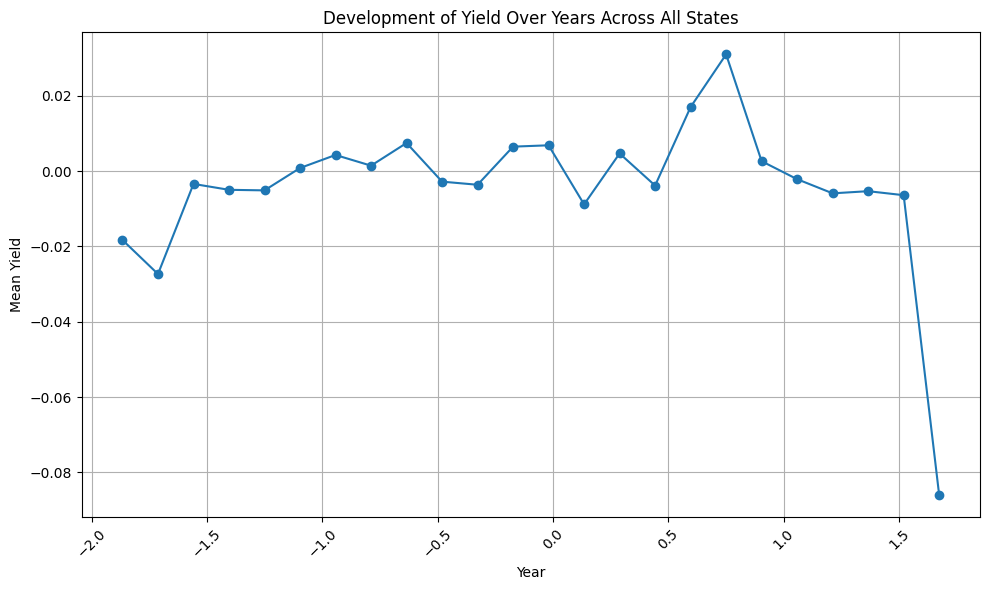

In [19]:
yearly_yield = data.groupby('Crop_Year')['Yield'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
plt.title('Development of Yield Over Years Across All States')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
X=data.iloc[:,:9]
y=data.iloc[:,9]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from keras.models import Sequential
from keras.layers import Dense


In [23]:
classifier=Sequential()
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='linear'))

In [24]:
classifier.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
classifier.fit(X_train,y_train,batch_size=32,epochs=150)

Epoch 1/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 49.9367
Epoch 2/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1910
Epoch 3/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8237
Epoch 4/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7187
Epoch 5/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7007
Epoch 6/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6448
Epoch 7/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5518
Epoch 8/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7189
Epoch 9/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5819
Epoch 10/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5812
Epoch 11/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6184
Epoch 12/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5991
Epoch 13/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4626
Epoch 14/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5692
Epoch 15/150
493/493 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [27]:
y_pred = classifier.predict(X_test)

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
mae=mean_absolute_error(y_test,y_pred)
mae

0.04503045736825378

In [29]:
mse = mean_squared_error(y_test, y_pred)
mse

0.11888502659275357

In [30]:
rmse = numpy.sqrt(mse)
rmse

0.34479708031355716

In [31]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 109 (436.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 220 (884.00 B)

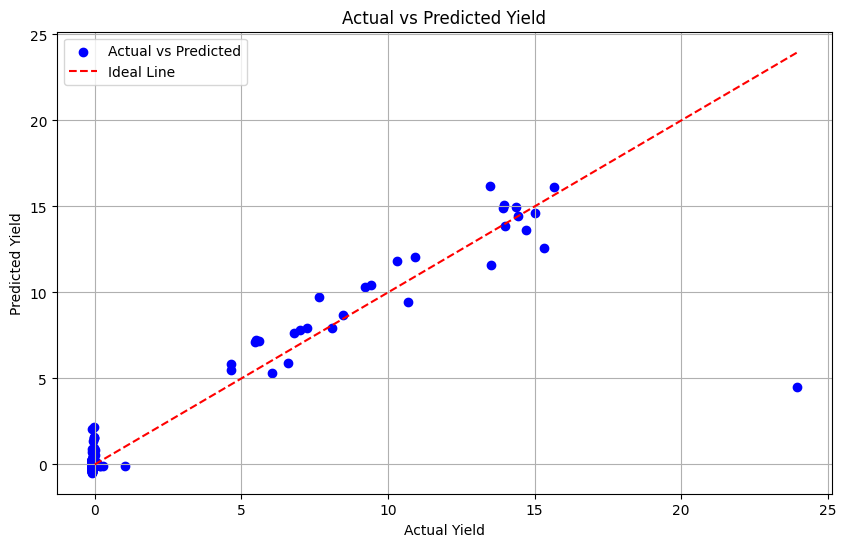

In [32]:
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test.values, y_pred, color='blue', label='Actual vs Predicted')

max_val = np.max([np.max(y_test), np.max(y_pred)])

plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import pickle